In [30]:
import os
import pandas as pd
import time
import statsmodels.api as sm
import sklearn.utils as utils
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
start_time = time.time()
MA_cities = ["Boston","Worcester","Salem","Plymouth","Newton","Waltham","Framingham"]
data = pd.DataFrame(columns = ["Company","Title","Location","Rating"])
print(MA_cities)
path = os.getcwd()+str("/Company")
print("Path is :",path)
index = 0
for file in os.listdir(path):
    f = open(path+"/"+file,'r')
    df = pd.read_csv(f)
    for i in range(len(df.index)):
        if df["Location"][i] in MA_cities:
            data.loc[index] = df.loc[i]
            index = index+1
print("Done!!!-------- %s seconds--------" % (time.time()-start_time))

['Boston', 'Worcester', 'Salem', 'Plymouth', 'Newton', 'Waltham', 'Framingham']
Path is : /Users/shuhanliu/Documents/CS505/project/Company
Done!!!-------- 18.5106999874115 seconds--------


In [24]:
data

,Company,Title,Location,Rating
0,Accion-International,Communications,Boston,4.0
1,Accion-International,Communications,Boston,4.0
2,Advanced-Micro-Devices--Inc-,"Co-op Engineer, Technology SoC team",Boston,5.0
3,Advanced-Micro-Devices--Inc-,"Co-op Engineer, Technology SoC team",Boston,5.0
4,AIR Worldwide,Risk Data Modelling Analyst - Scrum Master,Boston,3.0
5,AIR Worldwide,Senior Technical Writer,Boston,5.0
6,AIR Worldwide,Senior Database Engineer,Boston,4.0
7,AIR Worldwide,do not give out,Boston,3.0
8,AIR Worldwide,Software Engineer III,Boston,4.0
9,AIR Worldwide,QA Software Engineer,Boston,4.0


In [37]:
data.to_csv("collected_data.csv")

In [25]:
#normalize the data:
start_time = time.time()
data_list = []
for i in range(len(data.index)):
    temp = [0,0,0]
    if data["Title"][i].find("Engineer")!=-1:
        temp[0] = 1
    elif data["Title"][i].find("Analyst")!=-1:
        temp[0] = 2
    elif data["Title"][i].find("Consultant")!=-1:
        temp[0] = 3
    elif data["Title"][i].find("Writer")!=-1:
        temp[0] = 4
    elif data["Title"][i].find("Account")!=-1:
        temp[0] = 5
    elif data["Title"][i].find("Marketing")!=-1:
        temp[0] = 6
    elif data["Title"][i].find("Research")!=-1:
        temp[0] = 7
    elif data["Title"][i].find("Clinic")!=-1:
        temp[0] = 8
    elif data["Title"][i].find("Develop")!=-1:
        temp[0] = 9
    else:
        temp[0] = 0
        
    Location = data["Location"][i]
    for k in range(len(MA_cities)):
        if MA_cities[k] == Location:
            temp[1] = k+1
    temp[2] = data["Rating"][i]
    data_list.append(temp)
print("Done!!!-------- %s seconds--------" % (time.time()-start_time))

Done!!!-------- 0.9813408851623535 seconds--------


In [26]:
df2 = pd.DataFrame(data_list,columns = ["Category","Location","Rating"])

In [27]:
df2

,Category,Location,Rating
0,0,1,4.0
1,0,1,4.0
2,1,1,5.0
3,1,1,5.0
4,2,1,3.0
5,4,1,5.0
6,1,1,4.0
7,0,1,3.0
8,1,1,4.0
9,1,1,4.0


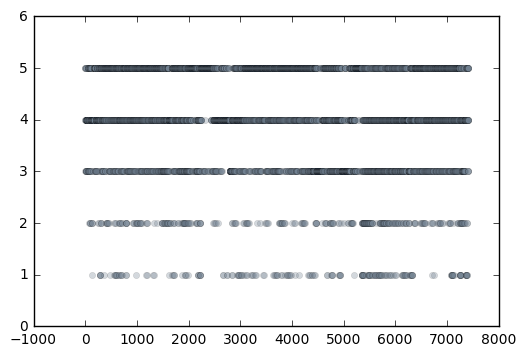

In [29]:
X = df2[["Category","Location"]]
Y = df2["Rating"]
plt.scatter(range(len(Y)), Y, c="slategray", alpha=0.3, linewidths=0.2)

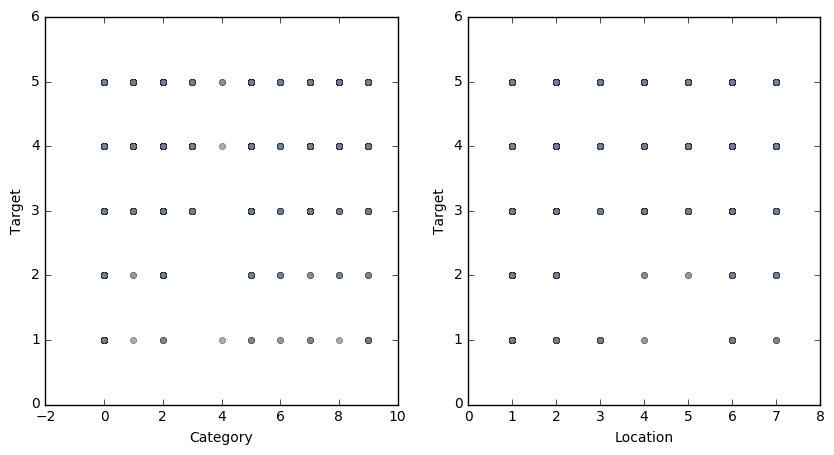

In [36]:
X, Y = utils.shuffle(X, Y, random_state=1)
fig, axes = plt.subplots(1,2,figsize=(10,5))
for i in range(2):
    plt_i = i
    subX = X[X.columns[i]]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i].scatter(subX, Y, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i].set_xlabel(X.columns[i])
    axes[plt_i].set_ylabel('Target'); 

In [38]:
model = sm.OLS(Y, X)
result1 = model.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     4890.
Date:                Tue, 22 Nov 2016   Prob (F-statistic):               0.00
Time:                        19:48:26   Log-Likelihood:                -18017.
No. Observations:                7415   AIC:                         3.604e+04
Df Residuals:                    7413   BIC:                         3.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Category       0.3563      0.014     26.120      0.0

In [47]:
good = []
for i in range(len(df2["Rating"])):
    if df2["Rating"][i] >3:
        good.append(1)
    else:
        good.append(0)

cols = df2.columns[:2]
logit = sm.Logit(good,df2[cols])

#fit the model
result2 = logit.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.597548
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7415
Model:                          Logit   Df Residuals:                     7413
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                -0.04555
Time:                        19:54:43   Log-Likelihood:                -4430.8
converged:                       True   LL-Null:                       -4237.8
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Category       0.1061      0.012      8.673      0.000         0.082     0.130
Location       0.4111      0.016     25.754      0.000         0.380     0.442
==============================================================================
"""

In [ ]:
#According to the results provided by both 
#Linear Regression and Logic Regression,
#Location is always has a larger influence
#on rating than Catergory.